# Titanic data: Learning from disaster

**Task**: predict survival of a passage giving his/her ticket class class, name, gender, age, number of siblings / spouses aboard,  number of parents / children aboard, ticket number, cabin number and Port of embarkation

**Notes:**
 
- Based on the tutorial 
- Fix some bugs
- Add cross-validation and grid search
- Add Validation and Learning curves

Part I : Exploratory Data Analysis
-------------------------

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

## Step 1: Load data

In [2]:
#-----------------------------------------------------------
# Step 01: load data using panda
#-----------------------------------------------------------
train_df = pd.read_csv('../input/train.csv')  # train set
test_df  = pd.read_csv('../input/test.csv')   # test  set
combine  = [train_df, test_df]

## Step 2: Acquire and clean data

In [3]:
#-----------------------------------------------------------
# Step 02: Acquire and clean data
#-----------------------------------------------------------
train_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
train_df.describe(include=['O'])

Name   Sex Ticket Cabin Embarked
count                   891   891    891   204      889
unique                  891     2    681   147        3
top     Windelov, Mr. Einar  male   1601    G6        S
freq                      1   577      7     4      644

Training data statistics:

 - 891 training samples
 - Age, Cabin, Embarked: incomplete data
 - Data type:
      - object: Name, Sex, Ticket, Cabin, Embarked
      - int64: PassengerId, Survived, Pclass, SibSp, Parch
      - float64: Age, Fare
 - Survive rate: 0.383838

In [7]:
 # remove Features: Ticket, Cabin
#train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
#test_df  = test_df.drop(['Ticket', 'Cabin'], axis=1)
#combine  = [train_df, test_df]
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna('U')
    dataset['Cabin'] = dataset.Cabin.str.extract('([A-Za-z])', expand=False)
    
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].map( {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E':0, 
                                            'F':0, 'G':0, 'T':0, 'U':1} ).astype(int)
    
train_df.head()
    

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  Cabin Embarked  
0      0         A/5 21171   7.2500      1        S  
1      0          PC 17599  71.2833      0        C  
2      0  STON/O2. 3101282   7.9250      1        S  
3      0            113803  53.1000      0        S  
4      0            373450   8.0500      1        S

In [8]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df  = test_df.drop(['Ticket'], axis=1)
combine  = [train_df, test_df]


# survival rate distribtion as a function of Pclass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [9]:
# obtain Title from name (Mr, Mrs, Miss etc)
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Dona'],'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Major','Rev'], 'Officer')
    dataset['Title'] = dataset['Title'].replace(['Jonkheer', 'Don','Sir'], 'Royalty')
    dataset.loc[(dataset.Sex == 'male')   & (dataset.Title == 'Dr'),'Title'] = 'Mr'
    dataset.loc[(dataset.Sex == 'female') & (dataset.Title == 'Dr'),'Title'] = 'Mrs'

#: count survived rate for different titles
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Title  Survived
3      Mrs  0.795276
1     Miss  0.702703
5  Royalty  0.600000
0   Master  0.575000
4  Officer  0.181818
2       Mr  0.158700

In [10]:
# Covert 'Title' to numbers (Mr->1, Miss->2 ...)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty":5, "Officer": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# Remove 'Name' and 'PassengerId' in training data, and 'Name' in testing data
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

# if age < 16, set 'Sex' to Child
for dataset in combine:
    dataset.loc[(dataset.Age < 16),'Sex'] = 'Child'
    
# Covert 'Sex' to numbers (female:1, male:2)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0, 'Child': 2} ).astype(int)

train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin Embarked  Title
0         0       3    0  22.0      1      0   7.2500      1        S      1
1         1       1    1  38.0      1      0  71.2833      0        C      3
2         1       3    1  26.0      0      0   7.9250      1        S      2
3         1       1    1  35.0      1      0  53.1000      0        S      3
4         0       3    0  35.0      0      0   8.0500      1        S      1

In [11]:
# Age distribution for different values of Pclass and gender
#grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
#grid.map(plt.hist, 'Age', bins=20)
#grid.add_legend()

In [12]:
# Guess age values using median values for age across set of Pclass and gender frature combinations
for dataset in combine:
    dataset['Age']=dataset.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean())).astype(int)

# create Age bands and determine correlations with Survived
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16]  0.550000
1     (16, 32]  0.339506
2     (32, 48]  0.404444
3     (48, 64]  0.434783
4     (64, 80]  0.090909

In [13]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Cabin Embarked  Title
0         0       3    0    1      1      0   7.2500      1        S      1
1         1       1    1    2      1      0  71.2833      0        C      3
2         1       3    1    1      0      0   7.9250      1        S      2
3         1       1    1    2      1      0  53.1000      0        S      3
4         0       3    0    2      0      0   8.0500      1        S      1

In [14]:
# Create family size from 'sibsq + parch + 1'
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#create another feature called IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[(dataset['FamilySize'] == 1), 'IsAlone'] = 1
    dataset.loc[(dataset['FamilySize'] > 4),  'IsAlone'] = 2

train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

#drop Parch, SibSp, and FamilySize features in favor of IsAlone
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age     Fare  Cabin Embarked  Title  IsAlone
0         0       3    0    1   7.2500      1        S      1        0
1         1       1    1    2  71.2833      0        C      3        0
2         1       3    1    1   7.9250      1        S      2        1
3         1       1    1    2  53.1000      0        S      3        0
4         0       3    0    2   8.0500      1        S      1        1

In [15]:
# Create an artfical feature combinbing PClass and Age.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

Age*Class  Age  Pclass
0          3    1       3
1          2    2       1
2          3    1       3
3          2    2       1
4          6    2       3

In [16]:
# fill the missing values of Embarked feature with the most common occurance
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

Survived  Pclass  Sex  Age     Fare  Cabin  Embarked  Title  IsAlone  \
0         0       3    0    1   7.2500      1         0      1        0   
1         1       1    1    2  71.2833      0         1      3        0   
2         1       3    1    1   7.9250      1         0      2        1   
3         1       1    1    2  53.1000      0         0      3        0   
4         0       3    0    2   8.0500      1         0      1        1   

   Age*Class  
0          3  
1          2  
2          3  
3          2  
4          6

In [17]:
# fill the missing values of Fare
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

# Create FareBand
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

# Convert the Fare feature to ordinal values based on the FareBand
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  IsAlone  \
0         0       3    0    1     0      1         0      1        0   
1         1       1    1    2     3      0         1      3        0   
2         1       3    1    1     1      1         0      2        1   
3         1       1    1    2     3      0         0      3        0   
4         0       3    0    2     1      1         0      1        1   

   Age*Class  
0          3  
1          2  
2          3  
3          2  
4          6

In [18]:
train_df.describe()

Survived      Pclass         Sex         Age        Fare       Cabin  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.490460    1.332211    1.505051    0.771044   
std      0.486592    0.836071    0.660838    0.822210    1.118148    0.420397   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    1.000000    0.500000    1.000000   
50%      0.000000    3.000000    0.000000    1.000000    2.000000    1.000000   
75%      1.000000    3.000000    1.000000    2.000000    2.000000    1.000000   
max      1.000000    3.000000    2.000000    4.000000    3.000000    1.000000   

         Embarked       Title     IsAlone   Age*Class  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.361392    1.711560    0.741863    2.785634  
std      0.635673    1.036888    0.575364    1.755907  
min      0.000000    1.000000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000    2.000000  
50%      0.000000    1.000000    1.000000    3.000000  
75%      1.000000    2.000000    1.000000    3.000000  
max      2.000000    6.000000    2.000000   12.000000

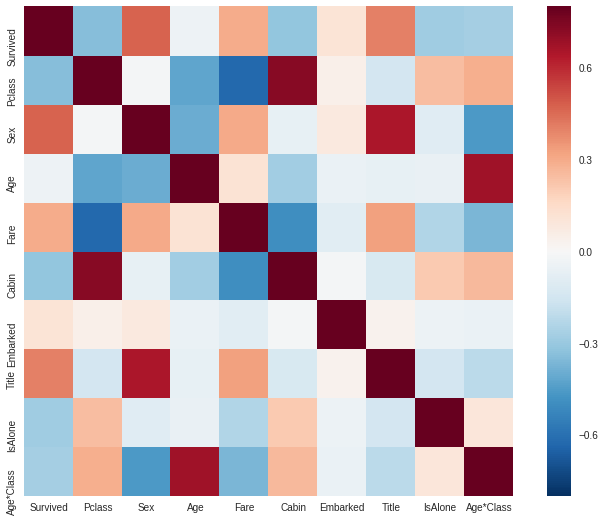

In [19]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train_df.corr(), vmax=.8, square=True);

Part II : Learning Model
-------------------

In [20]:
#------------------------------------------------------------------
# Step 03: Learning model
#------------------------------------------------------------------

X_data = train_df.drop("Survived", axis=1)          # data: Features
Y_data = train_df["Survived"]                       # data: Labels
X_test_kaggle  = test_df.drop("PassengerId", axis=1).copy() # test data (kaggle)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [21]:
# grid search
def grid_search_model(X, Y, model, parameters, cv):
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=cv)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)
    

In [22]:
#validation curve
def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):

    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Validation curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

    if log==True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel('Parameter C')
    plt.legend(loc="best")
    
    return plt

In [23]:
# Learning curve
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

In [24]:
# lrearning, prediction and printing results
def predict_model(X, Y, model, Xtest, submit_name):
    model.fit(X, Y)
    Y_pred  = model.predict(Xtest)
    score   = cross_val_score(model, X, Y, cv=cv)

    submission = pd.DataFrame({
            "PassengerId": test_df["PassengerId"],
            "Survived": Y_pred
        })
    submission.to_csv(submit_name, index=False)
    
    return score 

###  Logistic Regression

In [25]:
search_param = 0   # 1 -- grid search / 0 -- don't search
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [26]:
#grid search: Logistic Regression
model = LogisticRegression()
if search_param==1:
    
    param_range = np.logspace(-6, 5, 12)
    param_grid = dict(C=param_range)
    grid_search_model(X_data, Y_data, model, param_grid, cv)

In [27]:
#Validation Curve: Logistic Regression
if plot_vc == 1:
    param_range = np.logspace(-6, 3, 10)
    param_name="C"
    ylim=[0.55, 0.9]
    validation_curve_model(X_data, Y_data, model, "C", param_range, cv, ylim)

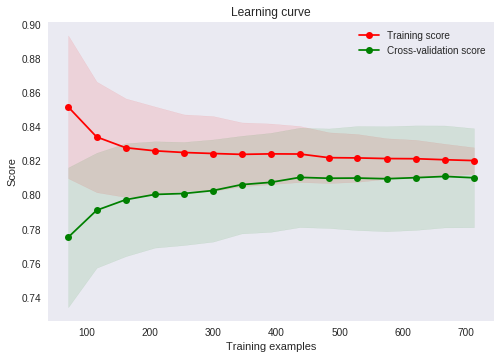

In [28]:
#learn curve
logreg  = LogisticRegression(C=1000)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_data, Y_data, logreg, cv, train_size)

In [29]:
# Logistic Regression 
acc_log = predict_model(X_data, Y_data, logreg, X_test_kaggle, 'submission_Logistic.csv')

###  Support Vector Machines

In [30]:
search_param = 0   # 1 -- grid search / 0 -- don't search
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [31]:


#grid search: SVM
search_param = 0
if search_param==1:
    param_range = np.linspace(0.5, 5, 9)
    param_grid = dict(C=param_range)

    grid_search_model(X_data, Y_data, SVC(), param_grid, cv)

In [32]:
#Validation Curve: SVC
if plot_vc == 1:
    param_range = np.linspace(0.1, 10, 10)
    param_name="C"
    ylim=[0.78, 0.90]
    validation_curve_model(X_data, Y_data, SVC(), "C", param_range, cv, ylim, log=False)

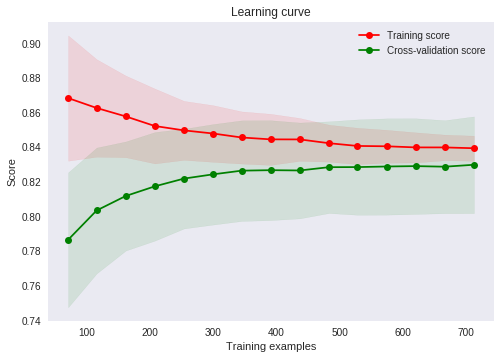

In [33]:
#learn curve: SVC
svc = SVC(C=1, probability=True)

if plot_lc == 1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_data, Y_data, svc, cv, train_size)

In [34]:
# Support Vector Machines
acc_svc = predict_model(X_data, Y_data, svc, X_test_kaggle, 'submission_SVM.csv')

### KNN

In [35]:
search_param = 0   # 1 -- grid search / 0 -- don't search
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [36]:
#grid search: KNN
if search_param==1:
    param_range = (np.linspace(1, 10, 10)).astype(int)
    param_grid = dict(n_neighbors=param_range)

    grid_search_model(X_data, Y_data, KNeighborsClassifier(), param_grid, cv)

In [37]:
#Validation Curve: KNN
if plot_vc==1:
    param_range = np.linspace(2, 20, 10).astype(int)
    param_name="n_neighbors"
    ylim=[0.75, 0.90]
    validation_curve_model(X_data, Y_data, KNeighborsClassifier(), "n_neighbors", param_range, cv, ylim, log=False)

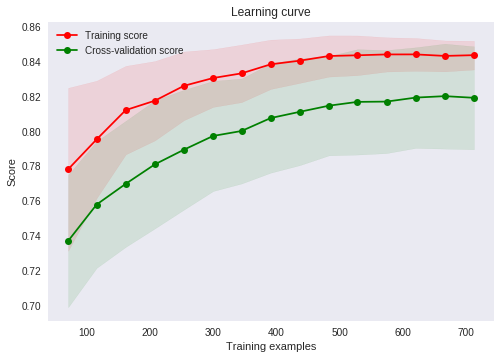

In [38]:
#learn curve: KNN
knn = KNeighborsClassifier(n_neighbors = 10)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_data, Y_data, knn, cv, train_size)

In [39]:
# KNN
acc_knn = predict_model(X_data, Y_data, knn, X_test_kaggle, 'submission_KNN.csv')

###  Naive Bayes

In [40]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
acc_gaussian = predict_model(X_data, Y_data, gaussian, X_test_kaggle, 'submission_Gassian_Naive_Bayes.csv')

### Perceptron

In [41]:
# Perceptron
perceptron = Perceptron()
acc_perceptron = predict_model(X_data, Y_data, perceptron, X_test_kaggle, 'submission_Perception.csv')

###  Linear SVC

In [42]:
# Linear SVC
linear_svc = LinearSVC()
acc_linear_svc = predict_model(X_data, Y_data, linear_svc, X_test_kaggle, 'submission_Linear_SVC.csv')

### Stochastic Gradient Descent

In [43]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
acc_sgd = predict_model(X_data, Y_data, sgd, X_test_kaggle, 'submission_stochastic_Gradient_Descent.csv')

### Decision Tree

In [44]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
acc_decision_tree = predict_model(X_data, Y_data, decision_tree, X_test_kaggle, 'submission_Decision_Tree.csv')

### Random Forest

In [45]:
search_param = 0   # 1 -- grid search / 0 -- don't search
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [46]:
#grid search: KNN (This step is very slow)
#param_range = (np.linspace(10, 110, 10)).astype(int)
#param_leaf = (np.linspace(1, 2, 2)).astype(int)
#param_grid = {'n_estimators':param_range, 'min_samples_leaf':param_leaf}

#grid_search_model(X_data, Y_data, RandomForestClassifier(), param_grid, cv)

In [47]:
if plot_vc==1:
    param_range = np.linspace(10, 110, 10).astype(int)
    ylim=[0.75, 0.90]
    validation_curve_model(X_data, Y_data, RandomForestClassifier(min_samples_leaf=12), "n_estimators", param_range, cv, ylim, log=False)

In [48]:
if plot_vc==1:
    param_range = np.linspace(1, 21, 10).astype(int)
    ylim=[0.75, 0.90]
    validation_curve_model(X_data, Y_data, RandomForestClassifier(n_estimators=80), "min_samples_leaf", param_range, cv, ylim, log=False)

In [49]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=80, random_state =0, min_samples_leaf = 12)
acc_random_forest = predict_model(X_data, Y_data, random_forest, X_test_kaggle, 'submission_random_forest.csv')

### Ensemble votring

In [50]:
#ensemble votring
ensemble_voting = VotingClassifier(estimators=[('lg', logreg), ('sv', svc), ('rf', random_forest),('kn',knn)], voting='soft')
acc_ensemble_voting = predict_model(X_data, Y_data, ensemble_voting, X_test_kaggle, 'submission_ensemble_voting.csv')

In [51]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                                'Random Forest', 'Naive Bayes', 'Perceptron',
                                'Stochastic Gradient Decent', 'Linear SVC',
                                'Decision Tree', 'ensemble_voting'],'KFoldScore': [acc_svc.mean(), acc_knn.mean(), acc_log.mean(),
                                acc_random_forest.mean(), acc_gaussian.mean(), acc_perceptron.mean(),
                                acc_sgd.mean(), acc_linear_svc.mean(), acc_decision_tree.mean(), acc_ensemble_voting.mean()],
                                'Std': [acc_svc.std(), acc_knn.std(), acc_log.std(),
                                acc_random_forest.std(), acc_gaussian.std(), acc_perceptron.std(),
                                acc_sgd.std(), acc_linear_svc.std(), acc_decision_tree.std(), acc_ensemble_voting.std()]})

models.sort_values(by='KFoldScore', ascending=False)

KFoldScore                       Model       Std
3    0.832346               Random Forest  0.029440
0    0.829777     Support Vector Machines  0.027938
9    0.827318             ensemble_voting  0.029562
1    0.819218                         KNN  0.029546
2    0.810112         Logistic Regression  0.029013
8    0.807598               Decision Tree  0.030795
7    0.804078                  Linear SVC  0.028967
4    0.746257                 Naive Bayes  0.031782
6    0.716983  Stochastic Gradient Decent  0.109859
5    0.698603                  Perceptron  0.113509